In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
df = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
df = df.drop('Unnamed: 12', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [4]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


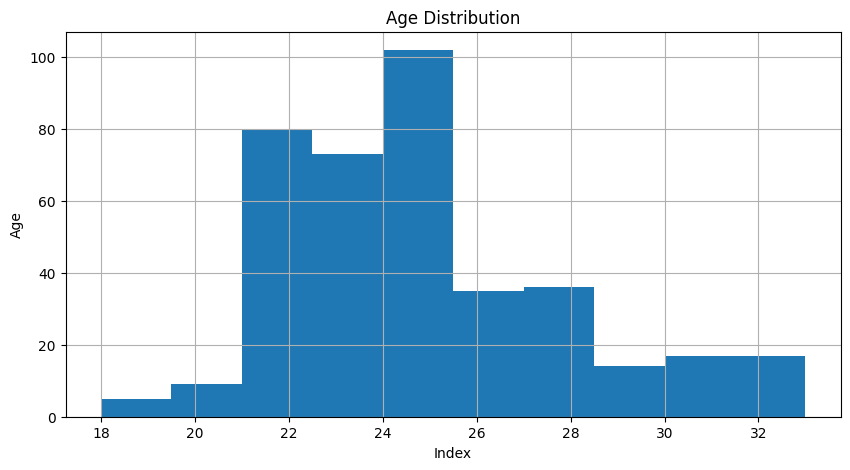

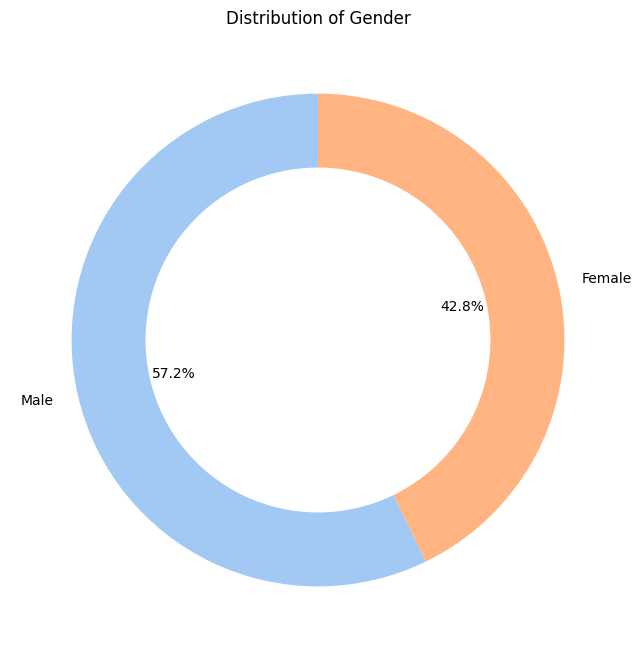

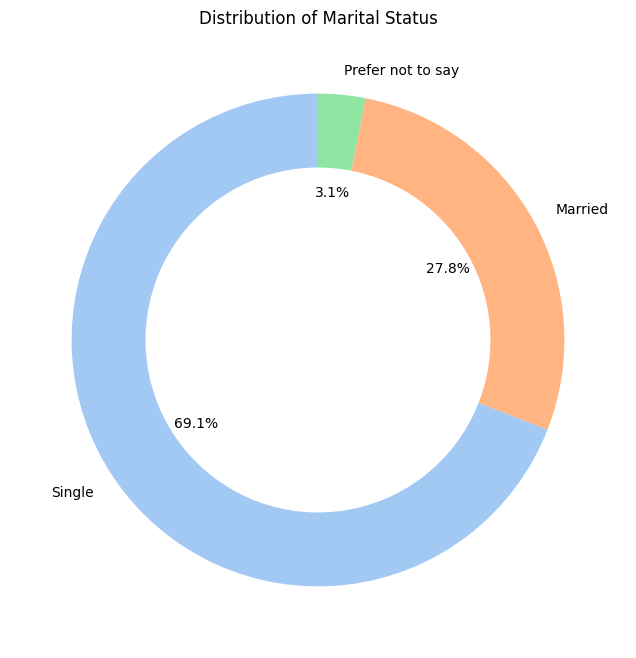

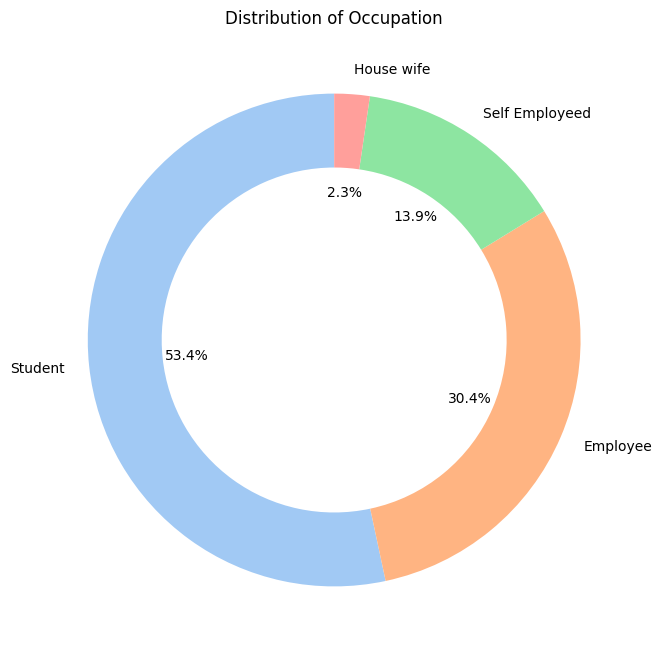

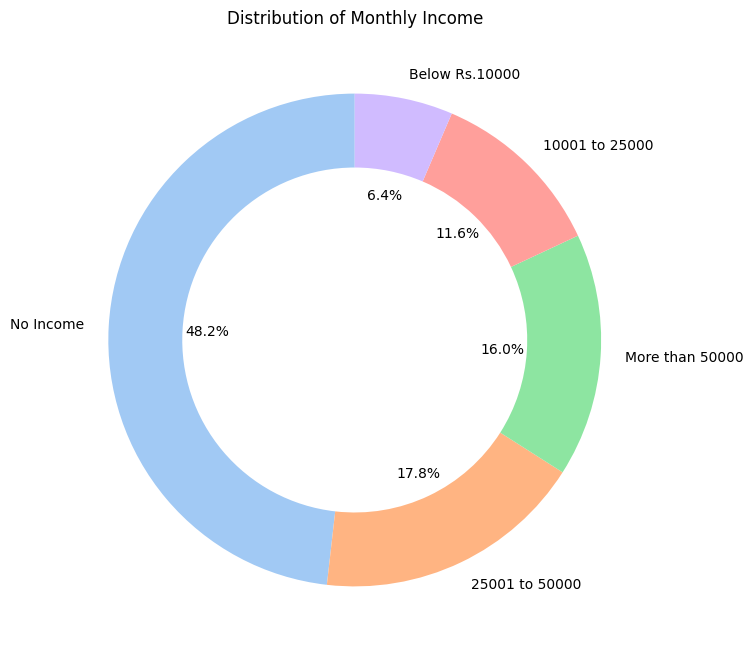

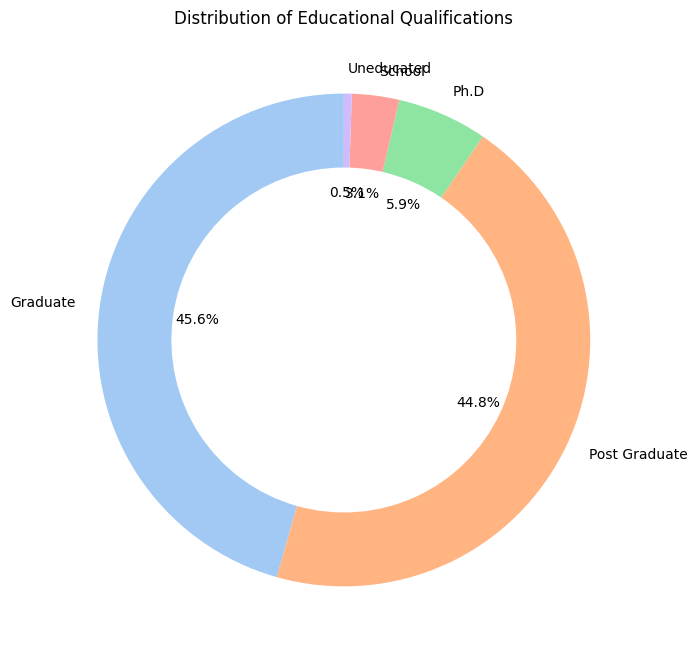

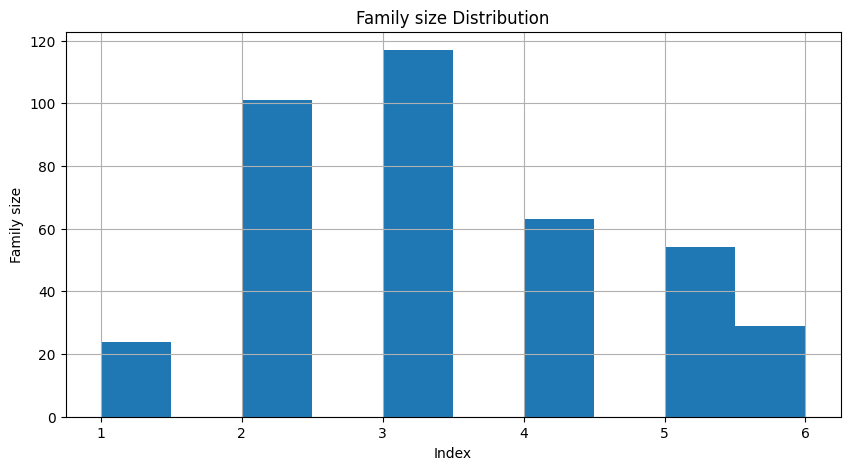

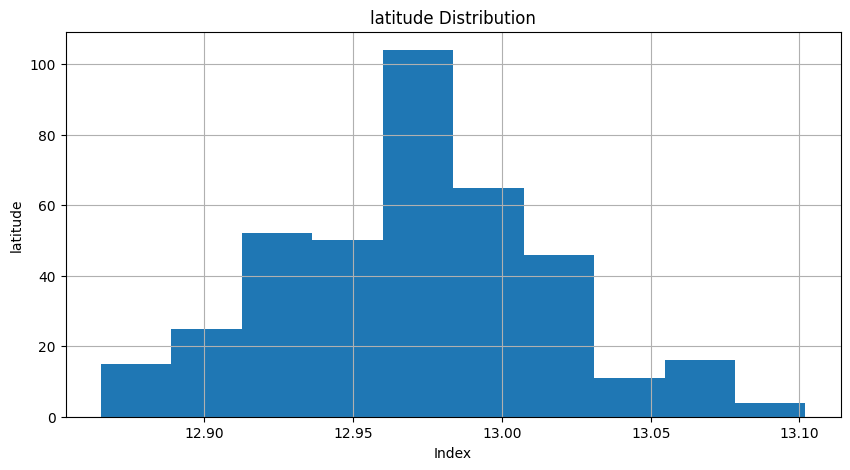

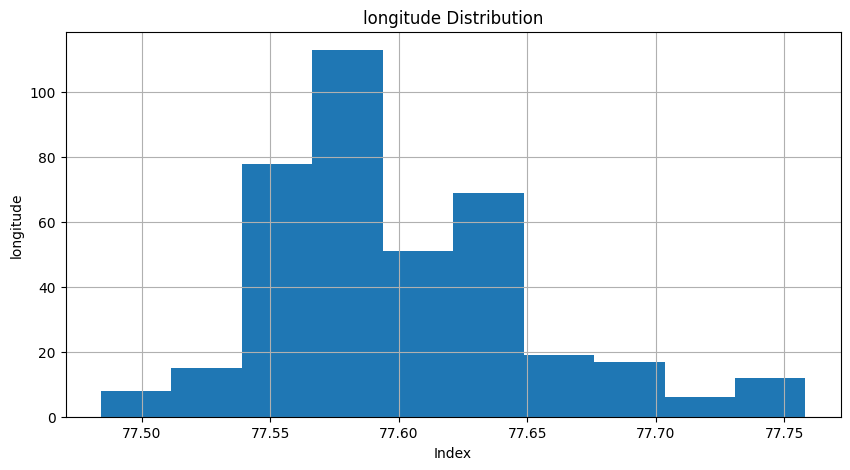

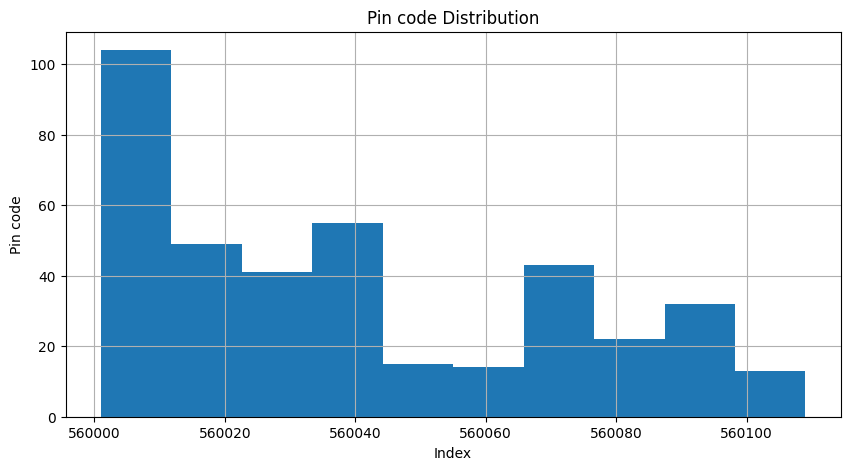

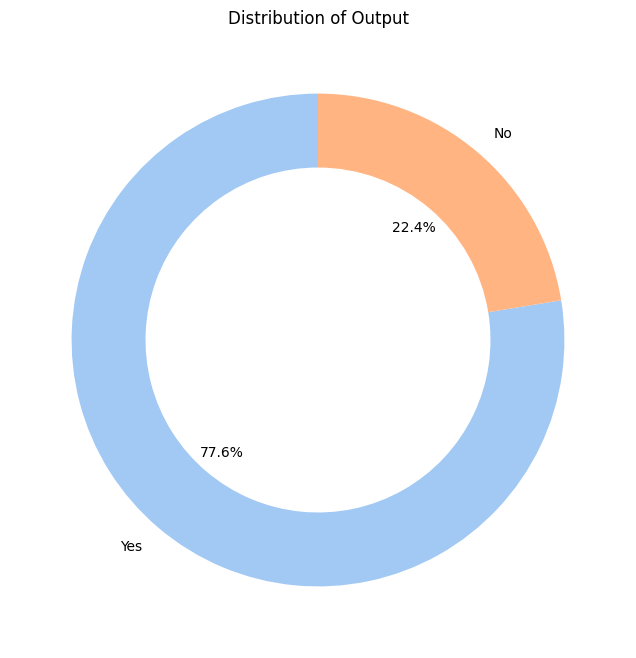

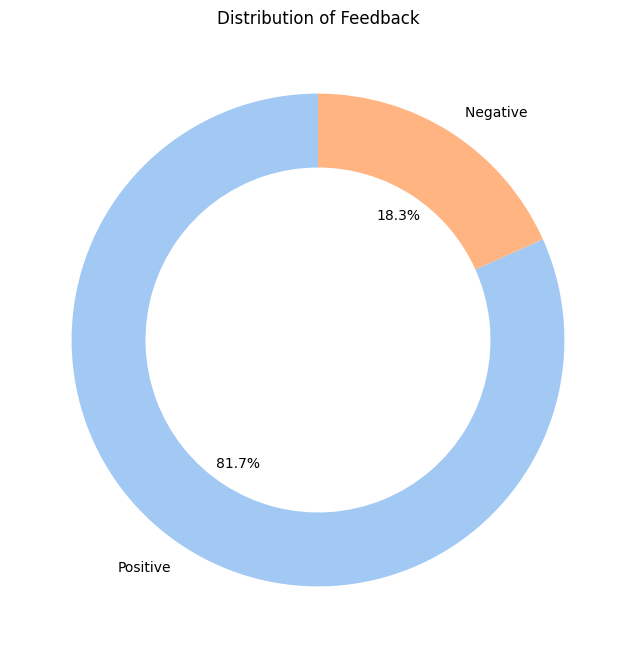

In [5]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()
    
    
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

In [6]:
df_dropped = df.drop(["Feedback", 'longitude', 'latitude', 'Pin code'], axis=1)

In [7]:
df_dropped.rename(columns = {'Marital Status':'Marital_Status', 'Monthly Income':'Monthly_Income', 'Educational Qualifications':"Education"}, inplace = True) 
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             388 non-null    int64 
 1   Gender          388 non-null    object
 2   Marital_Status  388 non-null    object
 3   Occupation      388 non-null    object
 4   Monthly_Income  388 non-null    object
 5   Education       388 non-null    object
 6   Family size     388 non-null    int64 
 7   Output          388 non-null    object
dtypes: int64(2), object(6)
memory usage: 24.4+ KB


In [8]:
X = df_dropped.drop(['Output'], axis=1)
y = df_dropped['Output']

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 388 entries, 0 to 387
Series name: Output
Non-Null Count  Dtype 
--------------  ----- 
388 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
label_encoder = LabelEncoder()
ohe = ce.OneHotEncoder()

#y = label_encoder.fit_transform(y)
#data_class = pd.DataFrame(labelEncoder(y[["Feedback"]]))
X = pd.DataFrame(ohe.fit_transform(X[["Gender", "Marital_Status", "Occupation", "Monthly_Income", "Education"]]))

In [10]:
df_encoded = pd.concat([df_dropped.drop(columns=['Gender', "Marital_Status", "Occupation", "Monthly_Income", "Education"]), X, y], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               388 non-null    int64 
 1   Family size       388 non-null    int64 
 2   Output            388 non-null    object
 3   Gender_1          388 non-null    int64 
 4   Gender_2          388 non-null    int64 
 5   Marital_Status_1  388 non-null    int64 
 6   Marital_Status_2  388 non-null    int64 
 7   Marital_Status_3  388 non-null    int64 
 8   Occupation_1      388 non-null    int64 
 9   Occupation_2      388 non-null    int64 
 10  Occupation_3      388 non-null    int64 
 11  Occupation_4      388 non-null    int64 
 12  Monthly_Income_1  388 non-null    int64 
 13  Monthly_Income_2  388 non-null    int64 
 14  Monthly_Income_3  388 non-null    int64 
 15  Monthly_Income_4  388 non-null    int64 
 16  Monthly_Income_5  388 non-null    int64 
 17  Education_1     

In [11]:
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 24 to 102
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender_1          271 non-null    int64
 1   Gender_2          271 non-null    int64
 2   Marital_Status_1  271 non-null    int64
 3   Marital_Status_2  271 non-null    int64
 4   Marital_Status_3  271 non-null    int64
 5   Occupation_1      271 non-null    int64
 6   Occupation_2      271 non-null    int64
 7   Occupation_3      271 non-null    int64
 8   Occupation_4      271 non-null    int64
 9   Monthly_Income_1  271 non-null    int64
 10  Monthly_Income_2  271 non-null    int64
 11  Monthly_Income_3  271 non-null    int64
 12  Monthly_Income_4  271 non-null    int64
 13  Monthly_Income_5  271 non-null    int64
 14  Education_1       271 non-null    int64
 15  Education_2       271 non-null    int64
 16  Education_3       271 non-null    int64
 17  Education_4       271 non-null    int64

In [12]:
'''# import category encoders

import category_encoders as ce

# encode variables with ordinal encoding
#@Gender	Marital Status	Occupation	Monthly Income	Educational Qualifications	
encoder = ce.OrdinalEncoder(cols=['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income', 'Education'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)'''

"# import category encoders\n\nimport category_encoders as ce\n\n# encode variables with ordinal encoding\n#@Gender\tMarital Status\tOccupation\tMonthly Income\tEducational Qualifications\t\nencoder = ce.OrdinalEncoder(cols=['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income', 'Education'])\n\nX_train = encoder.fit_transform(X_train)\nX_test = encoder.transform(X_test)"

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100,1))

Model Accuracy: 85.5


In [14]:
'''from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)  
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()'''

'from sklearn.tree import plot_tree\nunique_classes = np.unique(y_train)  \nplt.figure(figsize=(20,10))\nplot_tree(clf, filled=True)\nplt.show()'

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 150, max_depth = 10, random_state=42)
model = rfc.fit(X_train, y_train)

In [16]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.8717948717948718


              precision    recall  f1-score   support

          No       0.73      0.50      0.59        22
         Yes       0.89      0.96      0.92        95

    accuracy                           0.87       117
   macro avg       0.81      0.73      0.76       117
weighted avg       0.86      0.87      0.86       117



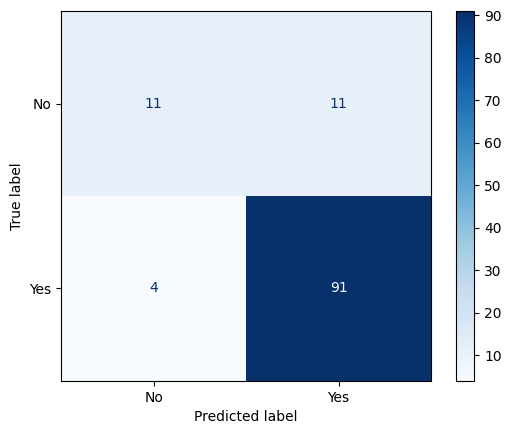

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Blues')
plt.show()

In [18]:
'''for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=model,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)'''

'for i in range(3):\n    tree = rfc.estimators_[i]\n    dot_data = export_graphviz(tree,\n                               feature_names=model,  \n                               filled=True,  \n                               max_depth=2, \n                               impurity=False, \n                               proportion=True)\n    graph = graphviz.Source(dot_data)\n    display(graph)'

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=105)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=105)

In [20]:
y_prediction_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_prediction_knn))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        22
         Yes       0.81      1.00      0.90        95

    accuracy                           0.81       117
   macro avg       0.41      0.50      0.45       117
weighted avg       0.66      0.81      0.73       117



In [21]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(max_iter=1000)
lg_model = lg_model.fit(X_train, y_train)

y_prediction_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_prediction_lg))

              precision    recall  f1-score   support

          No       1.00      0.09      0.17        22
         Yes       0.83      1.00      0.90        95

    accuracy                           0.83       117
   macro avg       0.91      0.55      0.54       117
weighted avg       0.86      0.83      0.77       117

